In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import linear_model
import statsmodels.api as sm

In [9]:
# Ask for input
query =input(print("Enter main query first, follow by ',' and no space after ','"))

Enter main query first, follow by ',' and no space after ','
NoneDubai,Mars,Maya USGC,Urals NWE,Urals MED


In [10]:
query_s = query.split(',')

In [4]:
plotx =input()

Dated Brent


In [5]:
usr = input()

In [6]:
include = input()

In [7]:
include_s = include.split(',')

In [39]:
#s = combi[query_s]

#s_s = s.iloc[:,0]
#k=s_s.iloc[s_s.to_numpy().nonzero()[0]]
#np.min(k.index.values)

In [ ]:
s = combi[query_s]

s_s = s.iloc[:,0]
k=s_s.iloc[s_s.to_numpy().nonzero()[0]]
first = np.min(k.index.values)

half = int((236 - first)/2)

train_combi = combi.iloc[first:first+half,1:]
test_combi = combi.iloc[first+half:,1:]

plt.rcParams['figure.dpi'] = 100

x_train=train_combi.drop(query_s,axis=1)
y_train=train_combi[query_s[0]]

#df.drop('b', axis=1)


x_test=test_combi.drop(query_s,axis=1)
y_test=test_combi[query_s[0]]
#y_test=test_combi[query_s].to_frame()

regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train[plotx],y_train,   color='grey')
plt_test=plt.scatter(x_test[plotx],y_test,   color='green')
plt_pred=plt.scatter(x_test[plotx], y_pred,  color='black')

plt.xlabel(plotx)
plt.ylabel(query_s[0])
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




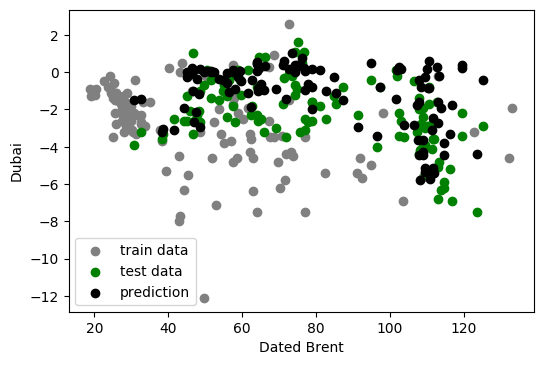

Mean squared error: 0.47
Feature ranking:
Feature Dated Brent (0.051561)
Feature Bonny light (0.012877)
Feature WTI (0.021558)
Feature Maya Europe (0.010155)
Feature ESPO (0.000000)
Feature LLS (0.038305)
Feature Propane (0.023141)
Feature Gasoline (0.046211)
Feature Jet (0.028292)
Feature Gasoil (0.007058)
Feature FO 1% (0.150341)
Feature ULSD (0.007996)
Feature Naphtha (0.034147)
Feature Butane (0.032316)
Feature FO 3.5% (0.455445)
Feature VGO 0.5% (0.015614)
Feature FO 0.5% (0.000000)
Feature VGO 2% (0.064982)


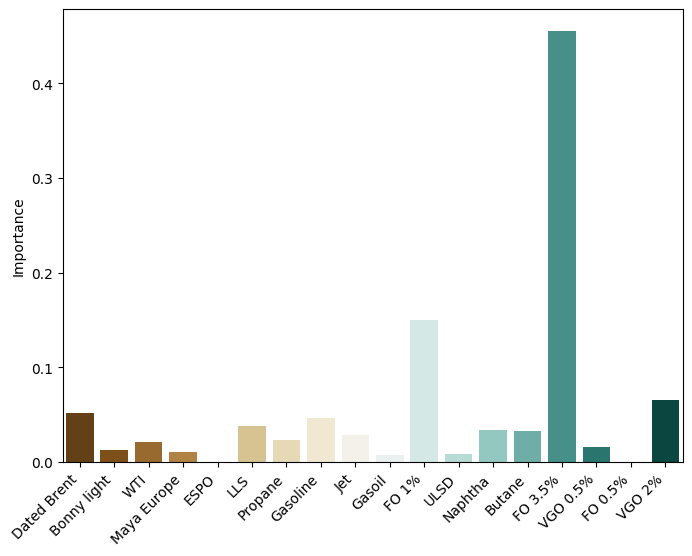

In [11]:
s = combi[query_s]

s_s = s.iloc[:,0]
k=s_s.iloc[s_s.to_numpy().nonzero()[0]]
first = np.min(k.index.values)
half = int((236 - first)/2)
train_combi = combi.iloc[first:first+half,1:]
test_combi = combi.iloc[first+half:,1:]


plt.rcParams['figure.dpi'] = 100



if usr == 'single':


    x_train=train_combi[include_s]
    y_train=train_combi[query_s[0]]

    x_test=test_combi[include_s]
    y_test=test_combi[query_s[0]]
    regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

    clf=regressor.fit(x_train, y_train)

    y_pred=regressor.predict(x_test)
    y_pred=pd.DataFrame(y_pred)


    plt_train=plt.scatter(x_train[include_s[0]],y_train,   color='grey')
    plt_test=plt.scatter(x_test[include_s[0]],y_test,   color='green')
    plt_pred=plt.scatter(x_test[include_s[0]], y_pred,  color='black')
    plt.xlabel(include_s[0])
    plt.ylabel(query_s[0])
    plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
    plt.show()
else:

    x_train=train_combi.drop(query_s,axis=1)
    y_train=train_combi[query_s[0]]

    x_test=test_combi.drop(query_s,axis=1)
    y_test=test_combi[query_s[0]]
#y_test=test_combi[query_s].to_frame()

    regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

    clf=regressor.fit(x_train, y_train)

    y_pred=regressor.predict(x_test)
    y_pred=pd.DataFrame(y_pred)


    plt_train=plt.scatter(x_train[plotx],y_train,   color='grey')
    plt_test=plt.scatter(x_test[plotx],y_test,   color='green')
    plt_pred=plt.scatter(x_test[plotx], y_pred,  color='black')

    plt.xlabel(plotx)
    plt.ylabel(query_s[0])
    plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
    plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [22]:
data =  {'Dated Brent':[65],'Butane':[-33.24]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[0.58938229]


/srv/conda/envs/notebook/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


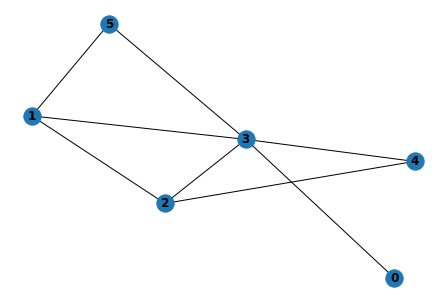

In [8]:
import networkx as nx
 
# Create a networkx graph object
my_graph = nx.Graph() 
 
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph.add_edges_from([
                        (1,2), 
                        (1,3), 
                        (3,4), 
                        (1,5), 
                        (3,5),
                        (4,2),
                        (2,3),
                        (3,0)])
 
# Draw the resulting graph
nx.draw(my_graph, with_labels=True, font_weight='bold')